# LINEAR REGRESSION #
Linear regression  is simply $ perdicted_y = \theta_0 + \theta_1*x_1 + \theta_2*x_2 + ... + \theta_3*x_3 $ (eq 1-1)

n = number of features

$ x_i $ = the $i^{th}$ feature

$\theta$ = the $j^{th}$ model parameter + the bias to also known as b or, $\theta_0$

Vector form:

$\hat{y} = h_\theta(x) = \theta*x$ eq(1-2)

$\theta$ = Parameter vector with $theta_0$ or b being in there

$x$ = the feature vector contain $x_0, x_1, ..., x_n$

$\theta*x$ = eq(1-1)



In [156]:
import numpy as np
import matplotlib.pyplot as plt
X = 2*np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [157]:
X_b = np.c_[np.ones((100,1)), X] 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.06129704],
       [3.10537603]])

In [158]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
print("X_new_b:\n",X_new_b)
print("y_predict:\n", y_predict)

X_new_b:
 [[1. 0.]
 [1. 2.]]
y_predict:
 [[ 4.06129704]
 [10.27204911]]


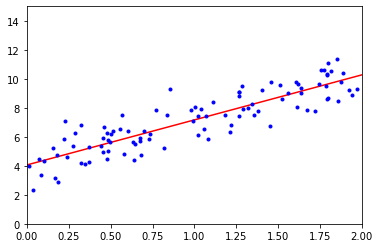

In [159]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [160]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_)
lin_reg.predict(X_new)

[4.06129704] [[3.10537603]]


array([[ 4.06129704],
       [10.27204911]])

In [161]:

theta_best_svd, residual,  rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.06129704],
       [3.10537603]])

SVD = Singular Value Decomposition

In [162]:
np.linalg.pinv(X_b).dot(y)

array([[4.06129704],
       [3.10537603]])

# Batch Gradient Decent #

Finds a minimum by using the MSE accross the whole training data, time does not scale well with number of features

$\triangledown_\theta MSE(\theta) = \frac{2}{m}X^T(X\theta - y)$

each step of descent represented as:

$next_\theta= \theta - \eta\triangledown_\theta MSE(\theta)$

In [163]:
learn_rate = 0.1 #also called eta
n_interations = 100
m = 100

theta = np.random.randn(2,1)

for iterations in range(n_interations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learn_rate * gradients

theta

array([[3.98341027],
       [3.17132166]])

# Stochastic Gradien Descent #
grabs a sing

In [164]:
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameters

def learning_scedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2* xi.T.dot(xi.dot(theta) - yi)
        learn_rate = learning_scedule(epoch*m+i)
        theta = theta - learn_rate*gradients

theta

array([[4.11042874],
       [3.11423466]])

In [165]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty="None", eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty='None')

In [166]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.06258403]), array([3.14708727]))

# Polynomial Regression #
using linear regressions with powers we can use it make linear regressions

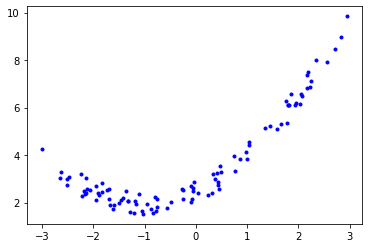

In [167]:
m = 100
X = 6*np.random.rand(m,1) - 3
X = X[X[:,0].argsort()]
y = 0.5 * X**2 + X + 2 +np.random.rand(m,1)
plt.plot(X,y,'b.')
plt.show()

In [168]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly  = poly_features.fit_transform(X)
print(X[0])
X_poly[0]


[-2.99607966]


array([-2.99607966,  8.9764933 ])

In [169]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.49822449]), array([[1.01430024, 0.49006922]]))

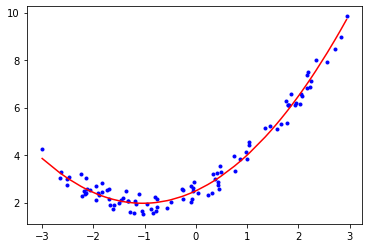

In [170]:
plt.plot(X,y,"b.")
plt.plot(X, lin_reg.predict(X_poly), "r-")
plt.show()

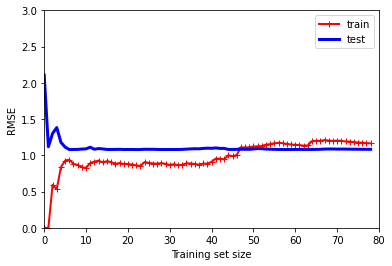

In [171]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
    train_errors, test_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="test")
    plt.legend(loc='upper right')
    plt.ylabel("RMSE")
    plt.xlabel("Training set size")
    plt.xlim(0,80)
    plt.ylim(0,3)

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X,y)

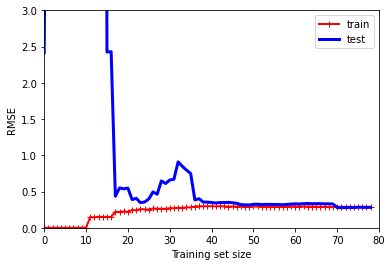

In [172]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X,y)

# Ridge Regression #

closed form solution:

$\hat{\theta}=(X^TX+\alpha A)^{-1}X^T y$

uses l2 norm to regularize

In [173]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.28620678]])

In [174]:
# With SGD

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([5.24712723])

# Lasso Regression #

cost function = $J(\theta)= MSE(\theta) + \alpha \sum_{i=1}^{n}|\theta|$

can do feature selection to get rid of useless features (i.e. $\theta_i=0$)

uses l1 norm

In [175]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.22772805])

# Elastic Net #

uses both Ridge Regression and Lassor Regression as a middle ground

uses variable $r$ as a ratio variable between the two regressions

closed form:

$J(\theta) = MSE(\theta) + r\alpha \sum_{i=1}^{n}|\theta_i| + \frac{1-r}{2}\alpha \sum_{i=1}^{n} \theta_i^2$

$r=0$ leads to Ridge Regression

$r=1$ leads to Lasso Regression

In [176]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.22853348])

# Early stopping #

Sometimes the model does well up to a point where it starts overfitting the training data and fails on validaion. 

if the validation has been away from is minimum error for quite some time it is recommend to exit early and go back to originally found minimum

In [177]:
# if new_val_error < min_val_error:
#   min_val_error = new_val
#   best_epoch = epoch
#   best_model = clone(model)

# Logistic Regression #

vectorized form:

$\hat{p}=h_{\theta}(x) = \sigma (\theta^Tx)$

Where $\sigma(.)$ is the sigmoid func:

$\sigma(t) = \frac{1}{1+exp(-t)}$

## Logistic Regression cost function ##

$J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)})]$

good as a binary classification

In [178]:
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys()))
X = iris["data"][:,3:] #petal width stuff
y = (iris["target"] == 2).astype(np.int)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']


In [179]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

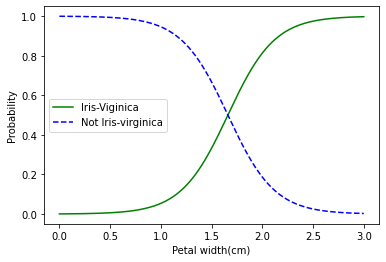

array([1, 0])

In [180]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Viginica")
plt.plot(X_new, y_proba[:, 0], "b--", label = "Not Iris-virginica")
plt.legend(loc="center left")
plt.xlabel("Petal width(cm)")
plt.ylabel("Probability")
plt.show()
log_reg.predict([[1.7],[1.5]])

# Softmax Regression #

multi-classifier for logistical regression creating a binary classifier for each class

function:

$\hat{p}_k = \sigma(s(x))_k = \frac{exp(s_k(x))}{\sum_{j=1}^{K} exp(s_j(x))}$

k = class

K = Number of classes

$\sigma$ = sigmoid function

$s_k(x) = (\theta^{(k)})^Tx$ = Softmax score/probability for an instance x belonging to class k

In [181]:
X = iris["data"][:,(2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [182]:
print(softmax_reg.predict([[5,2]]))

softmax_reg.predict_proba([[5,2]])


[2]


array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [183]:
iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target.values

In [184]:
#add bias
X_with_bias = np.c_[np.ones(len(X)), X]

In [185]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

np.random.seed(42)
rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_test = X_with_bias[rnd_indices[train_size:-test_size]]
y_test = y[rnd_indices[train_size:-test_size]]
X_valid = X_with_bias[rnd_indices[-validation_size:]]
y_valid = y[rnd_indices[-validation_size:]]

In [186]:
def to_one_hot(y):
    return np.diag(np.ones(y.max()+1))[y]

In [187]:
Y_train_one_hot = to_one_hot(y_train)
Y_test_one_hot = to_one_hot(y_test)
Y_valid_one_hot = to_one_hot(y_valid)

In [188]:
# scaling
mean = X_train[:, 1:].mean(axis=0)
std = X_train[:, 1:].std(axis=0)
X_train[:, 1:] = (X_train[:, 1:] - mean) / std
X_test[:, 1:] = (X_test[:, 1:] - mean) / std
X_valid[:, 1:] = (X_valid[:, 1:] - mean) / std

In [189]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = exps.sum(axis=1, keepdims=True) 
    return exps/ exp_sums 

In [193]:
n_inputs = X_train.shape[1]
n_outputs = len(np.unique(y_train))

In [201]:
learn_rate = 0.5
n_epochs = 5001
m = len(X_train)
epsilon = 1e-5

np.random.seed(42)
theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ theta
    y_proba = softmax(logits)
    if epoch % 1000 == 0:
        y_proba_valid = softmax(X_valid @ theta)
        cross_entropy_loss = -(Y_valid_one_hot * np.log(y_proba_valid + epsilon))
        print(epoch, cross_entropy_loss.sum(axis=1).mean())
    error = y_proba - Y_train_one_hot
    gradients = 2/m * X_train.T @ error
    theta = theta - learn_rate*gradients

0 3.488356607474006
1000 0.0717210013745912
2000 0.07723188763784004
3000 0.08623015917463277
4000 0.09447090054608644
5000 0.10152276868109132


In [202]:
theta

array([[ 0.7077659 ,  7.21254425, -6.91417177],
       [-7.72821647, -1.90080896, 10.68376495],
       [-6.19168712,  0.78219754,  7.28666274]])

In [204]:
logits = X_valid @ theta
y_proba = softmax(logits)
y_predict = y_proba.argmax(axis=1)

accurracy_score = (y_predict == y_valid).mean()
accurracy_score

0.9666666666666667

In [207]:
# early stopping
learn_rate = 0.5
epochs = 5001
m = len(X_train)
epsilon = 1e-5
C = 100
alpha = 0.1
best_loss = np.infty

np.random.seed(42)
theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(epochs):
    logits = X_train @ theta
    y_proba = softmax(logits)
    Y_proba_valid = softmax(X_valid @ theta)
    xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
    l2_loss = 1 / 2 * (theta[1:] ** 2).sum()
    total_loss = xentropy_losses.sum(axis=1).mean() + 1 / C * l2_loss
    if epoch % 1000 == 0:
        print(epoch, total_loss.round(4))
    if best_loss > total_loss:
        best_loss = total_loss
    else:
        print(epoch - 1, total_loss.round(4))
        print(epoch, total_loss.round(4), "early stopping")
        break
    error = (y_proba - Y_train_one_hot)
    gradients = 2/m * X_train.T @ error
    gradients += np.r_  [np.zeros([1, n_outputs]), 1 / C * theta[1:]]
    theta = theta - learn_rate*gradients

    
    


0 3.517
112 0.292
113 0.292 early stopping


In [209]:
logits = X_valid @ theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

0.9666666666666667